<a href="https://colab.research.google.com/github/rb-rishika/Imitation-Game/blob/main/Math_HW2_Q3_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

In [2]:
def initialization(D,k):
    #mean=0, standard deviation=1
    A = np.random.normal(0, 1, (D, D)) #dimension -> D*D
    v_vector = np.random.normal(0, 1, (D, 1)) #dimension-> D*1
    ek_vector = np.array([[int(i==k)] for i in range (0,D)])
    return A, v_vector, ek_vector,D


In [3]:
# Function to create error vector of i.i.d. normal variables
def createEtMatrix(sigma, D):
    e_t = np.random.normal(0, sigma, D)[np.newaxis]
    e_t = e_t.T
    return e_t

In [6]:
iterations= 0
norm_array=[]
A, v_vector, ek_vector,D=initialization(10,1)
alpha=0.1 #setting stepsize as 0.001
sigma=0
time=1
sigma = random.uniform(0,1)
norm_prev=0
while(True):
    alpha_dyn=alpha/time
    AT=np.transpose(A) #computing A transpose
    temp = np.subtract(np.matmul(np.matmul(AT,A),v_vector) , np.matmul(AT,ek_vector)) + createEtMatrix(sigma,D)

    v_vector = v_vector - alpha_dyn*temp
    norm=np.linalg.norm(np.subtract(np.matmul(A,v_vector),ek_vector))

    norm_array.append(norm)
    iterations+=1
    time+=1
    #print("Iterations {}: cost={}".format(iterations,norm))
    if np.isclose(norm_prev,norm):
        break
    norm_prev=norm


Text(0, 0.5, 'Iterations')

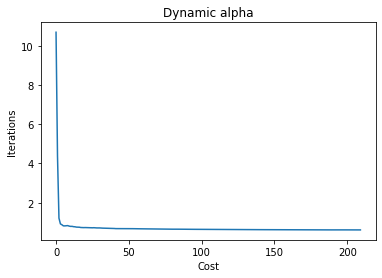

In [5]:
plt.plot(norm_array)
plt.title("Dynamic alpha")

plt.xlabel('Cost')
plt.ylabel('Iterations')
